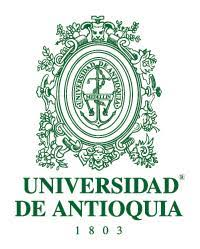

## **Miniproyecto 2 Modelos de Variable Latente para el Reconocimiento de Emociones**

Carolina Jiménez Restrepo

**Tratamiento de señales III**
**2023-2**

## Librerias

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression

## Lectura del data frame

In [113]:
dataFrame = pd.read_pickle('/content/drive/MyDrive/TDS3/Actividades/Matriz.pkl')
dataFrame

Promedio GSR  Proporción muestras negativas GSR  Potencia 1 GSR  \
0   -18005.683435                           0.175092    1.324827e+16   
1    -8794.650746                           0.123315    3.182187e+15   
2    -1331.408630                           0.127911    1.050701e+14   
3     3491.283824                           0.104167    5.152051e+14   
4    -3736.386024                           0.179228    5.783107e+14   
..            ...                                ...             ...   
155   5204.994820                           0.064951    1.128307e+15   
156   2975.633960                           0.075061    3.614324e+14   
157   7866.527529                           0.050092    2.563724e+15   
158  -2334.049943                           0.172028    2.283602e+14   
159     57.065275                           0.120711    1.793668e+13   

     Potencia 2 GSR  Potencia 3 GSR  Potencia 4 GSR  Potencia 5 GSR  \
0      1.820018e+15    1.299195e+15    2.999675e+14    1.554577e+14   
1      9.641417e+14    4.038839e+14    8.747527e+13    4.359242e+13   
2      7.772538e+13    1.064465e+13    2.104828e+12    1.218868e+12   
3      1.948242e+14    3.587921e+13    2.175470e+13    1.335715e+13   
4      1.654693e+14    2.956190e+13    2.066541e+13    1.884779e+13   
..              ...             ...             ...             ...   
155    3.685589e+13    1.851494e+13    1.013025e+13    8.734048e+12   
156    1.821335e+14    1.203046e+13    1.175122e+13    1.062599e+13   
157    3.271460e+14    5.379059e+13    2.057430e+13    1.451800e+13   
158    2.096848e+13    7.804638e+12    7.048904e+12    6.929199e+12   
159    1.011865e+13    1.945426e+12    1.208942e+12    8.330482e+11   

     Potencia 6 GSR  Potencia 7 GSR  Potencia 8 GSR  ...  Pot Alpha T8  \
0      1.389752e+14    1.155849e+14    1.018787e+14  ...      0.059805   
1      3.706457e+13    2.282915e+13    1.011612e+13  ...      0.050663   
2      7.853350e+11    5.798011e+11    5.240840e+11  ...      0.081392   
3      9.477871e+12    9.258891e+12    4.986428e+12  ...      0.164800   
4      1.669248e+13    1.244412e+13    8.400614e+12  ...      0.162878   
..              ...             ...             ...  ...           ...   
155    2.438860e+12    2.281311e+12    1.578460e+12  ...      0.066594   
156    4.786239e+12    3.244985e+12    2.732952e+12  ...      0.041914   
157    1.088284e+13    7.551157e+12    4.318652e+12  ...      0.011877   
158    2.888520e+12    2.236628e+12    1.360761e+12  ...      0.044652   
159    5.046881e+11    2.695268e+11    2.312013e+11  ...      0.011046   

     Pot Beta T8  Pote Gamma T8  Pot Alpha P3  Pot Beta P3  Pote Gamma P3  \
0     209.081999     626.517834      0.060947   148.682156     280.555355   
1     180.798331     169.559910      0.054627   118.042043      84.153282   
2     209.187311     290.776411      0.058341   127.169850     147.253722   
3     267.148910     237.890043      0.102806   150.122394      99.089607   
4     239.890903     159.612155      0.062664   161.770598      68.833606   
..           ...            ...           ...          ...            ...   
155    66.171837      18.752460      0.056133   129.382567      30.374613   
156    45.980171      16.711169      0.099239   122.245647      29.076624   
157    54.927643      19.400254      0.024097   143.610109      38.818626   
158    50.644001      31.750751      0.084630    96.402846      33.583795   
159    64.498603      46.338991      0.042456    93.900440      31.156071   

     Pot Alpha P4  Pot Beta P4  Pote Gamma P4  Emociones  
0        0.051872   177.814958     505.813631        2.0  
1        0.109006   131.285066     136.897662        1.0  
2        0.047109   130.703544     353.188633        2.0  
3        0.063703   141.406450     237.462649        2.0  
4        0.104578   123.655222     125.324484        0.0  
..            ...          ...            ...        ...  
155      0.062847   134.410959      38.643778        0.0  
1

In [114]:
# A continuación se extraen las etiquetas de emociones y los valores de las características
y = dataFrame['Emociones']
x = dataFrame.drop(columns = ['Emociones']).values #Se elimina la columna de las emociones
N, D = x.shape #(160,93)

# Convertir la etiqueta en un array de enteros
scaler = StandardScaler()
scaler.fit(x)
X= scaler.transform(x)

# Imprimir el número de ejemplos y características
print('Número de datos:', N)
print('Número de características:', D)

Número de datos: 160
Número de características: 93


## Punto 1

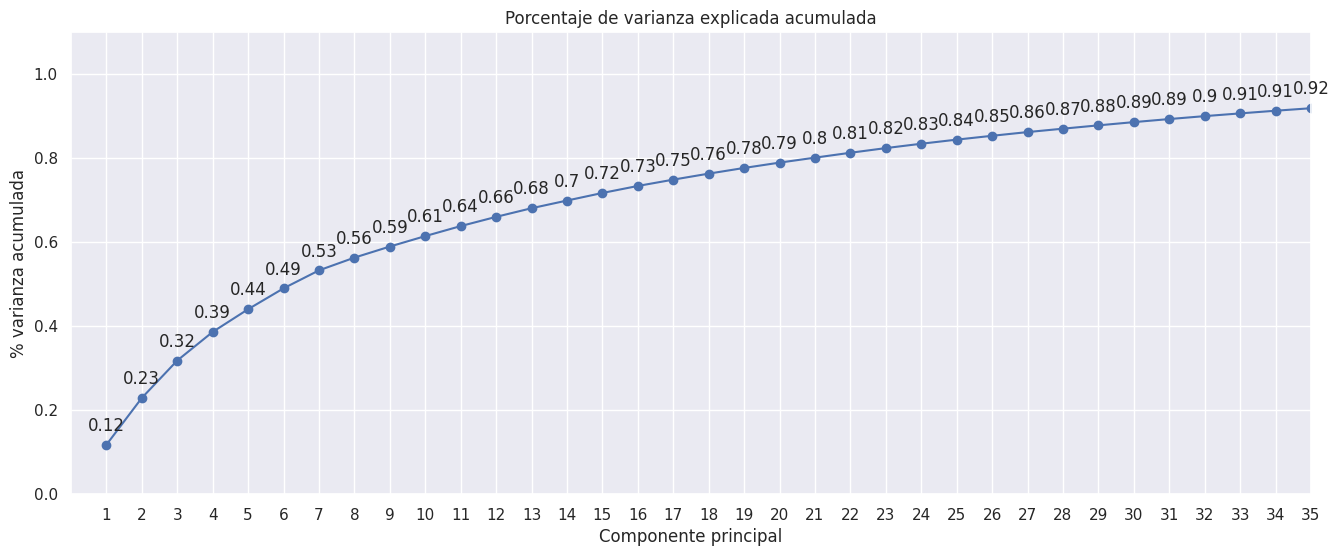

In [115]:
fd = pd.DataFrame(X)

# Entrenamiento modelo PCA con escalado de los datos
pca_pip = make_pipeline(StandardScaler(), PCA())
pca_pip.fit(fd)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pip.named_steps['pca']
var_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(np.arange(len(fd.columns)) + 1, var_acum, marker = 'o')

for j, i in zip(np.arange(len(fd.columns)) + 1, var_acum):
    label = round(i, 2)
    ax.annotate(label, (j,i), textcoords="offset points", xytext=(0,10), ha='center')


ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xlim(0, 35)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza acumulada');

Se usa la gráfica acumulativa para observar en que componente se alcanza el 90% de la varianza, para esto se limitó el eje x a 35 ya que la cantidad de componentes equivale a 93 y no se podía visualizar bien.
En la gráfica se observa que al rededor de 32 componentes se alcanza el 90%.

Se realiza el análisis con valores de q = [2,4,8,12]



###Para q = 2

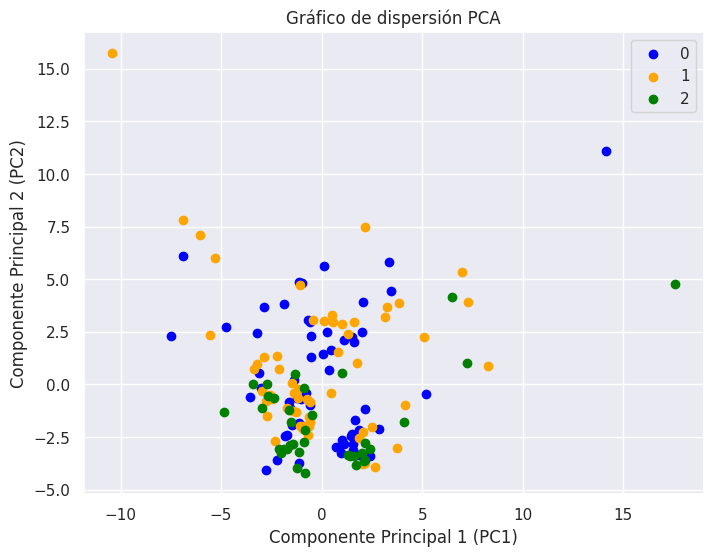

In [116]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)
BasisW = pca.components_

# Crear un DataFrame con los resultados de PCA y las etiquetas
df_resultado = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_resultado['Etiqueta'] = y

# Graficar el scatter plot
plt.figure(figsize=(8, 6))

# Colores para cada clase
colores = ['blue', 'orange', 'green']

for etiqueta, color in zip(range(len(colores)), colores):
    plt.scatter(
        df_resultado[df_resultado['Etiqueta'] == etiqueta]['PC1'],
        df_resultado[df_resultado['Etiqueta'] == etiqueta]['PC2'],
        color=color,
        label=etiqueta
              )

plt.title('Gráfico de dispersión PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend()
plt.show()

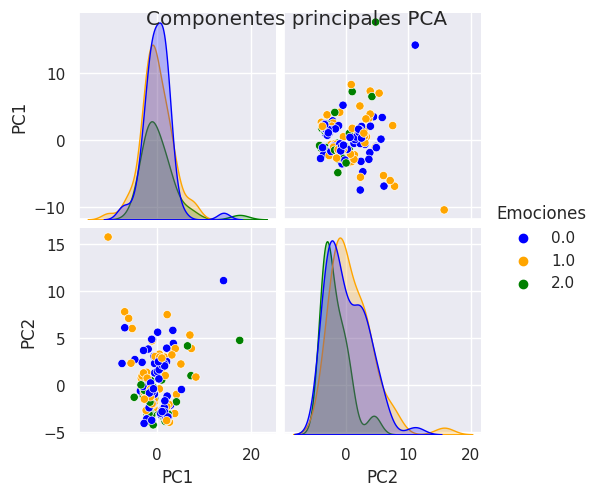

In [117]:
data = pd.DataFrame(data=df_pca, columns=["PC1", "PC2"])
data["Emociones"] = y  # Agregar las etiquetas de estados emocionales

# Utiliza pair plot para visualizar las relaciones entre las proyecciones en pares de componentes principales
sns.pairplot(data, hue="Emociones", palette=colores)
plt.suptitle('Componentes principales PCA')
plt.show()

### Para q = 4

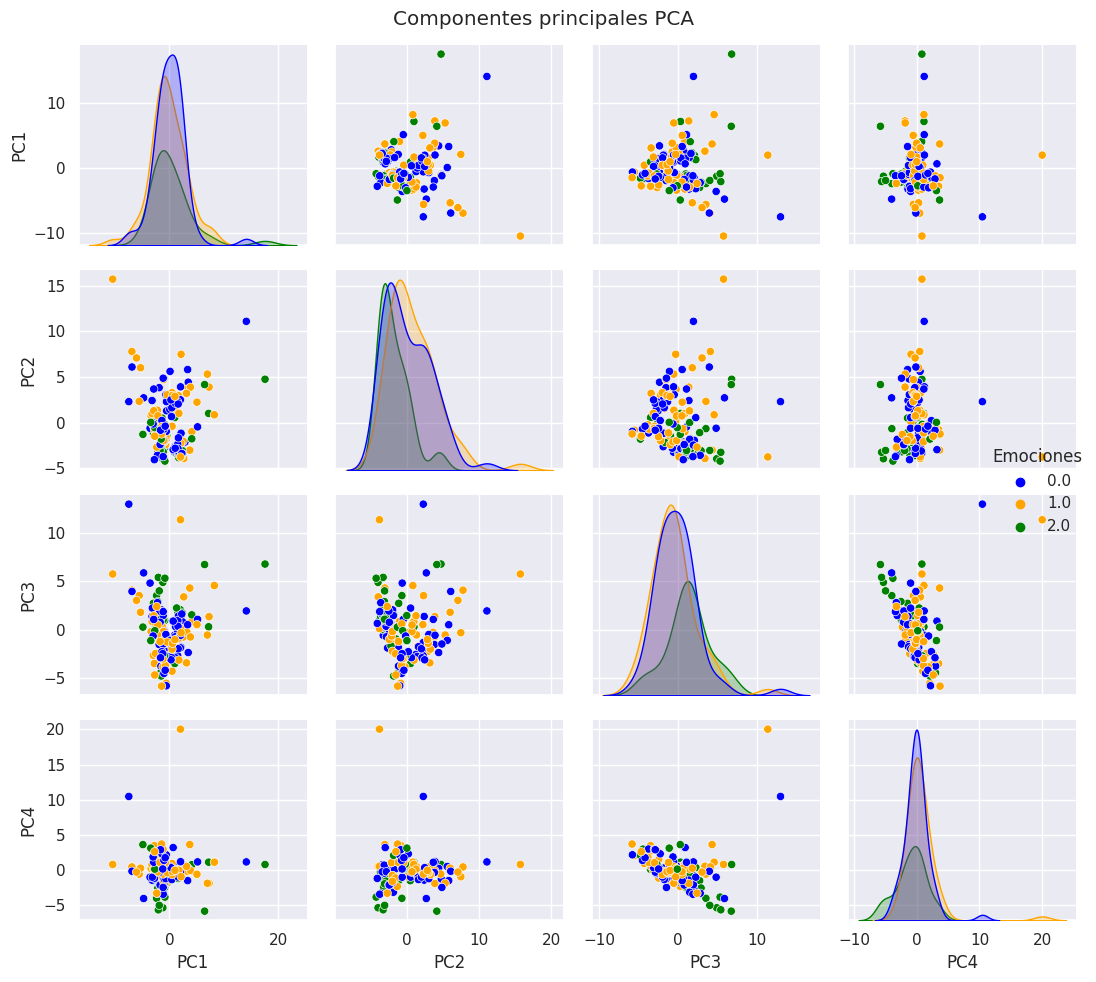

In [127]:
# Obtén las componentes principales proyectadas
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X) #Se entrega un array con el ajuste y la transformación de los datos

# Crea un DataFrame para facilitar la visualización con seaborn
data = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3", "PC4"])
data["Emociones"] = y  # Agregar las etiquetas de estados emocionales

# Utiliza pair plot para visualizar las relaciones entre las proyecciones en pares de componentes principales
sns.pairplot(data, hue="Emociones", palette=colores)
plt.suptitle('Componentes principales PCA')
plt.tight_layout()
plt.show()

###Para q = 8

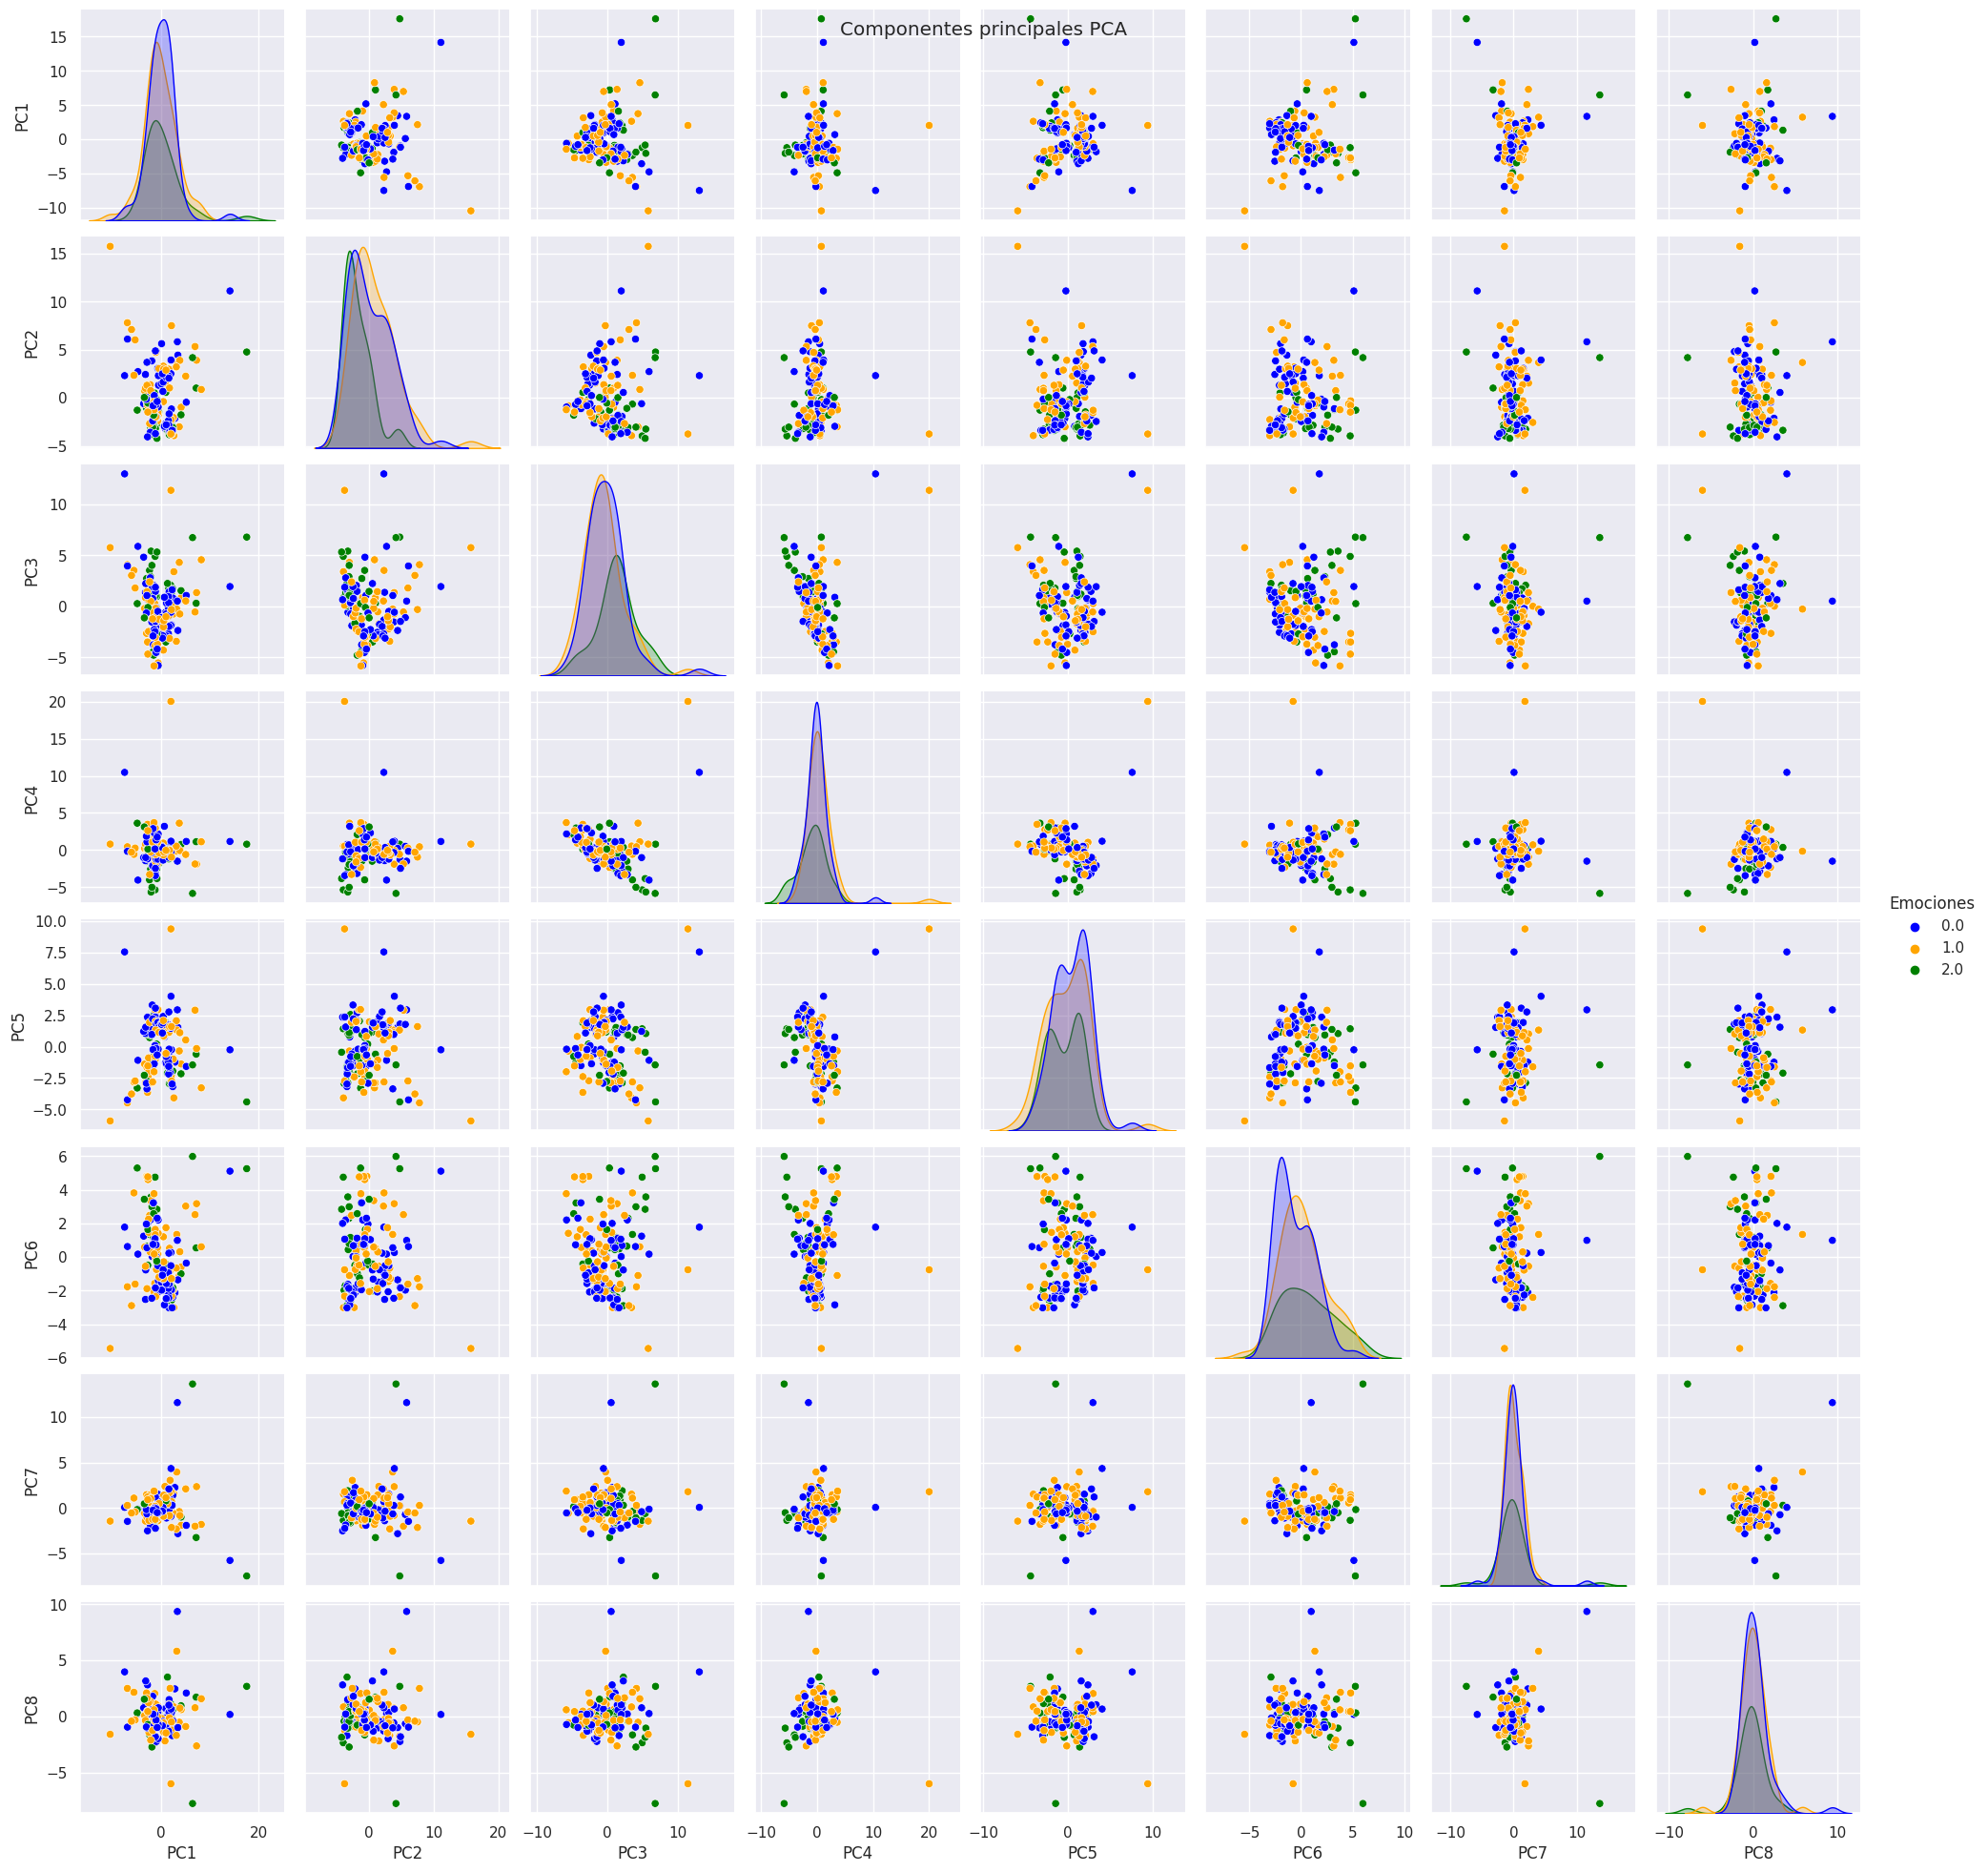

In [109]:
# Obtén las componentes principales proyectadas
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X) #Se entrega un array con el ajuste y la transformación de los datos

# Crea un DataFrame para facilitar la visualización con seaborn
data = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])
data["Emociones"] = y  # Agregar las etiquetas de estados emocionales

# Utiliza pair plot para visualizar las relaciones entre las proyecciones en pares de componentes principales
sns.pairplot(data, hue="Emociones", palette=colores)
plt.suptitle('Componentes principales PCA')
#plt.tight_layout()
plt.show()

### Para q = 12

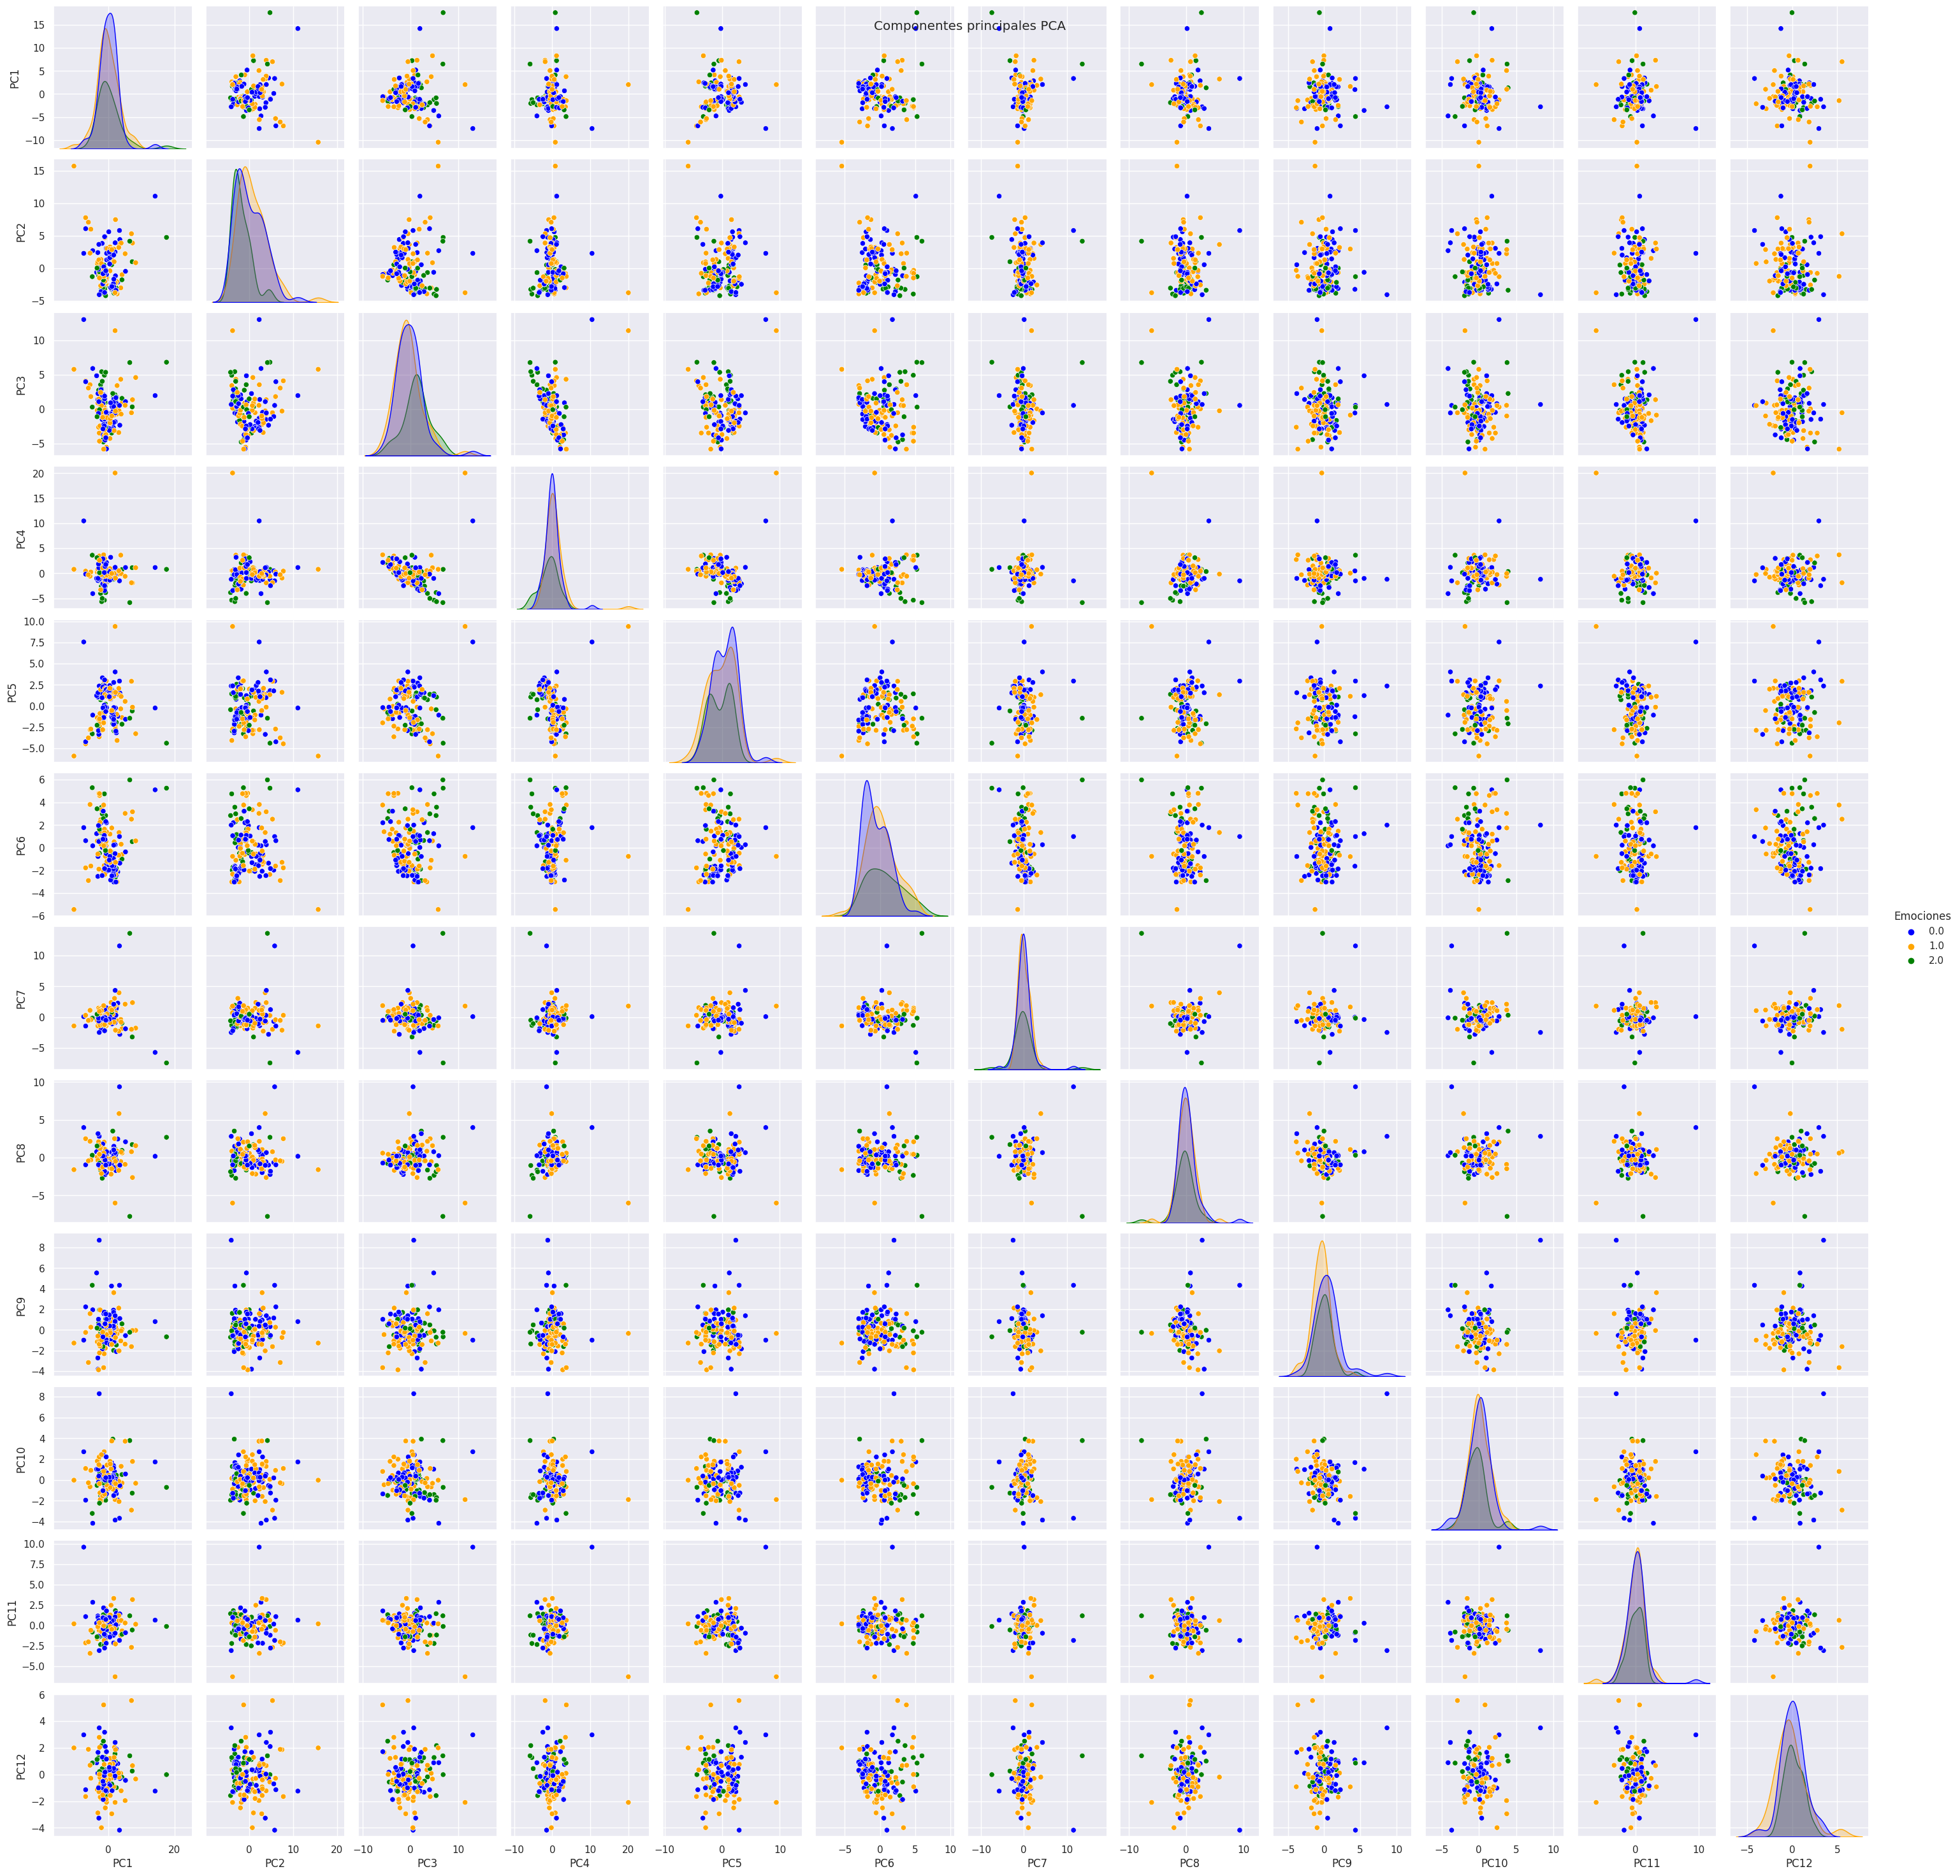

In [110]:
# Obtén las componentes principales proyectadas
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X) #Se entrega un array con el ajuste y la transformación de los datos

# Crea un DataFrame para facilitar la visualización con seaborn
data = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"])
data["Emociones"] = y  # Agregar las etiquetas de estados emocionales

# Utiliza pair plot para visualizar las relaciones entre las proyecciones en pares de componentes principales
sns.pairplot(data, hue="Emociones", palette=colores)
plt.suptitle('Componentes principales PCA')
#plt.tight_layout()
plt.show()

### Qué puede observar al respecto?
Si se aumenta mucho el número de caracteristicas puede que algunas de ellas esten correlacionadas entre si haciendo que las tres emociones analizadas no se puedan diferenciar muy bien.

Se observa que la emoción que más predomina es el enojo.
Al analizar los 4 PCAs se encuentran muchos datos atípicos.

### Mínimos Cuadrados, Bayesiano y Regresión Logística

###Regresión Bayesiana sin PCA

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred).sum())
accTrain = accuracy_score(y_train,y_pred_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred)
print('Acc Test: ',accTest)

Number of mislabeled points out of a total  48  points :  31
Acc Train:  0.6071428571428571
Acc Test:  0.3541666666666667


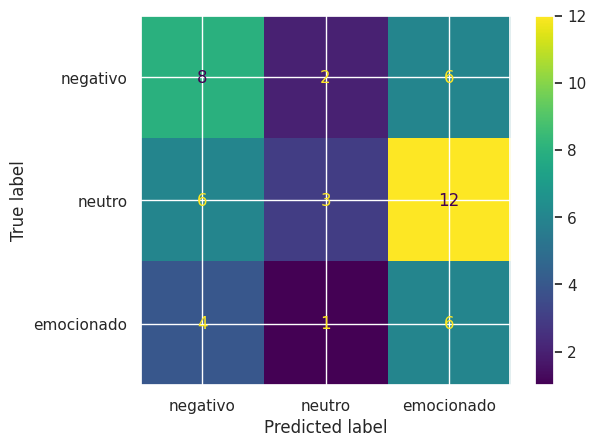

In [119]:
y_names =['negativo', 'neutro', 'emocionado']
cMat_test = confusion_matrix(y_test,y_pred)
ax = ConfusionMatrixDisplay(cMat_test,display_labels = y_names)
ax.plot()
plt.show()

### Regresión Bayesiana con PCA

In [120]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred).sum())
accTrain = accuracy_score(y_train,y_pred_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred)
print('Acc Test: ',accTest)

Number of mislabeled points out of a total  48  points :  33
Acc Train:  0.4375
Acc Test:  0.3125


In [121]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred).sum())
accTrain = accuracy_score(y_train,y_pred_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred)
print('Acc Test: ',accTest)

Number of mislabeled points out of a total  48  points :  27
Acc Train:  0.48214285714285715
Acc Test:  0.4375


In [122]:
pca = PCA(n_components=8)
df_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred).sum())
accTrain = accuracy_score(y_train,y_pred_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred)
print('Acc Test: ',accTest)

Number of mislabeled points out of a total  48  points :  30
Acc Train:  0.5
Acc Test:  0.375


In [123]:
pca = PCA(n_components=12)
df_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred).sum())
accTrain = accuracy_score(y_train,y_pred_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred)
print('Acc Test: ',accTest)

Number of mislabeled points out of a total  48  points :  28
Acc Train:  0.5446428571428571
Acc Test:  0.4166666666666667


In [124]:
pca = PCA(n_components=32)
df_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred).sum())
accTrain = accuracy_score(y_train,y_pred_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred)
print('Acc Test: ',accTest)

Number of mislabeled points out of a total  48  points :  26
Acc Train:  0.6964285714285714
Acc Test:  0.4583333333333333


### Regresión Logística

In [125]:

clf = LogisticRegression(penalty ='l2',random_state=0, C = 1).fit(X_train, y_train)

y_pred_LR_train = clf.predict(X_train)
y_pred_LR_test = clf.predict(X_test)


print("[Logistic Regression] Number of mislabeled points out of a total ",X_test.shape[0]," points : ", (y_test != y_pred_LR_test).sum())
accTrain = accuracy_score(y_train,y_pred_LR_train)
print('Acc Train: ',accTrain)
accTest = accuracy_score(y_test,y_pred_LR_test)
print('Acc Test: ',accTest)
cMat_test = confusion_matrix(y_test,y_pred_LR_test)
ax = ConfusionMatrixDisplay(cMat_test,display_labels = t_names)
ax.plot()
plt.show()

Number of mislabeled points out of a total  48  points :  26
Acc Train:  0.75
Acc Test:  0.4583333333333333


Number of mislabeled points out of a total  48  points :  32
Acc Train:  0.9107142857142857
Acc Test:  0.3333333333333333
